# Projet 1 - MATH2305P
Nom : Edward, Brenton, Simon

## Introductions
- Import les modules nécessaires, `numpy` et `sympy`
- Nous adoptons cette forme d'équation : $$ax+by+cz=d$$

In [52]:
import numpy as np
import sympy as sp
from sympy import symbols
a1, a2, a3 = symbols("a1 a2 a3")
b1, b2, b3 = symbols("b1 b2 b3")
c1, c2, c3 = symbols("c1 c2 c3")
d1, d2, d3 = symbols("d1 d2 d3")
m, n, p, q = symbols("m n p q")
x, y, z = symbols("x y z")
lamda, mu, gamma = symbols("lambda mu gamma")

import matplotlib.pyplot as plt

## Construction Basique
- On va constuire les points, droites et plans dans cette partie. Chaque object est représenté de 1, 2 ou 3 équation(s).
- Définir les points, droites, plans comme :
    - `point = Point(); droite = Droite(); plan = Plan()` - Sans input, il va fonctionner avec les paramètres inconnues.
    - `point = Point((2, 1, 3), (3, 1, 2), (1, 2, 4))` - 2 paranthèse avec 3 variables dans chaque paranthèse
    - `droite = Droite((2, 1, 1), (2, 3, 1))`
    - `plan = Plan((1, 2, 1))`

- Les paramètres :
    - Équation de l'object : `OBJECT.eqs`
    - Les paramètres de chaque object : `OBJECT.params`.

In [71]:
class Point():
    def __init__(self, eq1_param=(a1, b1, c1, d1),
                       eq2_param=(a2, b2, c2, d2),
                       eq3_param=(a3, b3, c3, d3),
                       variable=[x, y, z]):
        
        self.eqs = [
            eq1_param[0]*x + eq1_param[1]*y + eq1_param[2]*z - eq1_param[3],
            eq2_param[0]*x + eq2_param[1]*y + eq2_param[2]*z - eq2_param[3],
            eq3_param[0]*x + eq3_param[1]*y + eq3_param[2]*z - eq3_param[3]
        ]
        
        self.params = [eq1_param, eq2_param, eq3_param]
        self.eqparam = [(eq1_param[0],eq1_param[1],eq1_param[2]),
                        (eq2_param[0],eq2_param[1],eq2_param[2]),
                        (eq3_param[0],eq2_param[1],eq3_param[2])] 
        
        if sp.Matrix(self.eqparam).det()==0:
            raise ValueError
        
    def info(self):
        print("Les équation de ce point :")
        for index, eq in enumerate(self.eqs):
            display(eq)
        
point_exemple = Point((2, 3, 1, 1), (2, 3, 2, 1), (3, 1, 2, 2))
point_exemple.info()

Les équation de ce point :


2*x + 3*y + z - 1

2*x + 3*y + 2*z - 1

3*x + y + 2*z - 2

Ce type d'input est invalide :

In [54]:
try:
    point_exemple = Point((2, 3, 1, 1), (4, 6, 2, 2), (3, 1, 2, 2))
except:
    print("Haha! Il ne fonctionne pas!")

In [76]:
class Droite():
    def __init__(self, eq1_param=(a1, b1, c1, d1),
                       eq2_param=(a2, b2, c2, d2),
                       variable=[x, y, z]):
        
        if (type(eq1_param[0]) == float or type(eq1_param[0]) == int):
            if (type(eq2_param[0]) == float or type(eq2_param[0]) == int):
                assert not ((eq2_param[0]/eq1_param[0] == eq2_param[1]/eq1_param[1] == eq2_param[2]/eq1_param[2]))
                
        self.eqs = [
            eq1_param[0]*x + eq1_param[1]*y + eq1_param[2]*z - eq1_param[3],
            eq2_param[0]*x + eq2_param[1]*y + eq2_param[2]*z - eq2_param[3],
        ]
        
        self.params = [eq1_param, eq2_param]
        self.eqparam = [(eq1_param[0],eq1_param[1],eq1_param[2]),
                        (eq2_param[0],eq2_param[1],eq2_param[2]),] 

    def info(self):
        print("Les équation de ce droite :")
        for index, eq in enumerate(self.eqs):
            display(eq)
        
M, N, P = sp.symbols("M N P") 
droite_exemple = Droite((2, 1, 3, 1), (M, N, P, 1))
droite_exemple.info()

Les équation de ce droite :


2*x + y + 3*z - 1

M*x + N*y + P*z - 1

In [77]:
class Plan():
    def __init__(self, eq_param=(m, n, p, q)):
        self.eqs = [
            eq_param[0]*x + eq_param[1]*y + eq_param[2]*z - eq_param[3]
        ]
        
        self.params = [eq_param]
    
    def info(self):
        print("L'équation de ce plan :")
        for index, eq in enumerate(self.eqs):
            display(eq)
        
plan_exemple = Plan(); plan_exemple.info()

L'équation de ce plan :


m*x + n*y + p*z - q

Trouver une équation supplémentaire du point (choisit aléatoirement) sur le droite.

In [78]:
class Point_de_droite():
    def __init__(self, m,
                       droite=Droite(),
                       variable=[x, y, z]):
        
        eq3_param_0 = [(1, 0, 0),(0, 1, 0),(0, 0, 1)]
        eq3_param_1 = [(1, 0, 0, m),(0, 1, 0, m),(0, 0, 1, m)]
        
        for i in range(3):
            if sp.Matrix([eq3_param_0[i],droite.eqparam[0],droite.eqparam[1]]).det()!=0:
                eq3_param=eq3_param_1[i]
                break
        
        self.eqs = [
            droite.params[0][0]*x + droite.params[0][1]*y + droite.params[0][2]*z - droite.params[0][3],
            droite.params[1][0]*x + droite.params[1][1]*y + droite.params[1][2]*z - droite.params[1][3],
            eq3_param[0]*x + eq3_param[1]*y + eq3_param[2]*z - eq3_param[3]
        ]

        self.params = [droite.params[0],droite.params[1], eq3_param]

    def info(self):
        print("Les équations de ce point :")
        for eq in self.eqs:
            display(eq)

droite_ici = Droite((2, 1, 3, 1), (1, 1, 3, 1))
point = Point_de_droite(m,droite_ici)
point.params

[(2, 1, 3, 1), (1, 1, 3, 1), (0, 1, 0, m)]

## Opération (a): Parallèlement

> Dans cette partie, on va construire un plan (1 équation) passant par un point (3 équations) et parallèle à un plan donné (1 équation).

- Notations:
    - Le plan donné : $$mx+ny+pz=q \quad(\mathscr{P}_d)$$
    - Le point donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$Cela implique une point notant $\bar{x}\in \mathbb R^3$ suffit à la fois ces trois équations est : $$\bar{x} \in \mathscr{H}_1\cap \mathscr{H}_2 \cap\mathscr{H}_3$$
    - Les trois hyperplans correspondants : $$\begin{cases}\mathscr{H}_1 = \text{Ker }(\varphi_1),\quad \varphi_1:(x,y,z)\mapsto a_1x+b_1y+c_1z-d_1\\ \mathscr{H}_2 = \text{Ker }(\varphi_2),\quad \varphi_2:(x,y,z) \mapsto a_2x+b_2y+c_2z-d_2\\ \mathscr{H}_3 = \text{Ker }(\varphi_3),\quad \varphi_3:(x,y,z)\mapsto a_3x+b_3y+c_3z-d_3\end{cases}$$
    
- Le plan que l'on souhaite est parallèle au plan donné, c'est-à-dire, les deux plans sont deux translations distincts d'une même espace vectoriel, la même hyperplan associé à $$\varphi_p:(x,y,z) \mapsto mx+ny+pz$$
- D'après le **Faisceau d'hyperplan**, on sais que si une sous-espace affine $\mathscr{P}=\text{Ker }(p)$ suffit $$\mathscr{P}=\text{Ker }(p) \supset \bigcap_{i=1}^3\mathscr{H}_i = \bigcap_{i=1}^3\text{Ker }\varphi_i$$Alors, $$p = \text{Vect }(\{\varphi_1,\varphi_2, \varphi_3\})$$

- Ça sert à quoi ? Le plan que l'on souhaite contient le point commune de ces hyperplans $\bar{I}$, qui est l'intersection de tous les $(\mathscr{H}_i)$. Donc le plan peut exprimer comme $\mathscr{P}=\text{Ker }(p)$. Cela nous inspire de trouver l'équation étant égale à $0$, la combinaison linéaire de $\{\varphi_1,\varphi_2, \varphi_3\}$.

- En admettant que $(\lambda, \mu, \gamma)\in\mathbb{R}^3\setminus\{(0,0,0)\}$, On exprime le plan comme $$\lambda(a_1x+b_1y+c_1z-d_1)+ \mu(a_2x+b_2y+c_2z-d_2)+\gamma(a_3x+b_3y+c_3z-d_3)=0\quad(\mathscr{P})$$ Est-ce qu tous les coefficients suffisent ? Évidemment non, en fait le point $\bar{I}$ est aussi sur ce plan, il est à la fois suffit : $$mx+ny+pz=q'$$.

- On en déduit que, soit $\bar{I} = (\bar{x}, \bar{y}, \bar{z})$ : $$\begin{cases}(\lambda a_1 +\mu a_2 + \gamma a_3)\bar{x} + (\lambda b_1 + \mu b_2+ \gamma b_3)\bar{y} +(\lambda c_1 + \mu c_2 + \gamma c_3) \bar{z} -\lambda d_1 - \mu d_2 - \gamma d_3&= 0\\ m\bar{x} + n\bar{y} + p\bar{z}-q'&=0\end{cases}$$où $q'$, le coefficient de notre nouvel plan qui est inconnue et à déterminer. Cela permet de trouver les relations entre les trois paramètres, ici $(\lambda, \mu, \gamma)$ est une solution de ces équation.


In [57]:
def parallel(point=Point(), plan=Plan()):
     parametre_lambda_gamma_mu = sp.solve([lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0] - plan.params[0][0], # lambda * a1 + mu * a2 + gamma * a3 = m
                                           lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1] - plan.params[0][1], # lambda * b1 + mu * b2 + gamma * b3 = n
                                        lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2] - plan.params[0][2]], [lamda, mu, gamma]) # lambda * c1 + mu * c2 + gamma * c3 = p
     
     
     point_func = sp.Matrix([[point.params[0][0], point.params[0][1], point.params[0][2], -point.params[0][3]], # a1, b1, c1, -d1
                             [point.params[1][0], point.params[1][1], point.params[1][2], -point.params[1][3]], # a2, b2, c2, -d2
                             [point.params[2][0], point.params[2][1], point.params[2][2], -point.params[2][3]], # a3, b3, c3, -d3
                             ])
     
     Result = sp.Matrix([lamda, mu, gamma]).subs(parametre_lambda_gamma_mu).transpose() * point_func
     Result.simplify()
     return Result

Notre exemple :

In [58]:
point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
plan_reference = Plan((2, 1, 3, -3)) 
ans = parallel(point_intersection, plan_reference)
ans

Matrix([[2, 1, 3, -10/17]])

### Partie Matplotlib
Étape 1 : Point représenté par 3 équations

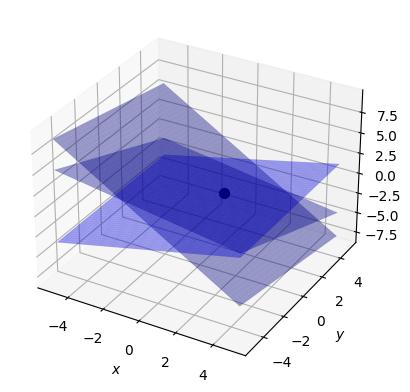

In [84]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="blue", alpha=0.4)

# Le ligne 20 est SEULEMENT POUR DÉMONSTRATION, MAIS PAS DANS LA PARTIE D'ILLUSTRATION !
point_commun = sp.solve((point_intersection.eqs[0], point_intersection.eqs[1], point_intersection.eqs[2]), (x, y, z))
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=50)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./a1.pdf")
plt.show()

Étape 2 : Configuration de la THM : Faisceau d'hyperplan

On prend *aléatoirement* les valeurs de $\lambda$, $\mu$ et $\gamma$. Un bon exemple : (-1.0936323053030361, 1.1812328251926272, 1.0351804640514914), comme ce que l'on a expliqué : $$\lambda(a_1x+b_1y+c_1z-d_1)+ \mu(a_2x+b_2y+c_2z-d_2)+\gamma(a_3x+b_3y+c_3z-d_3)=0\quad(\mathscr{P})$$


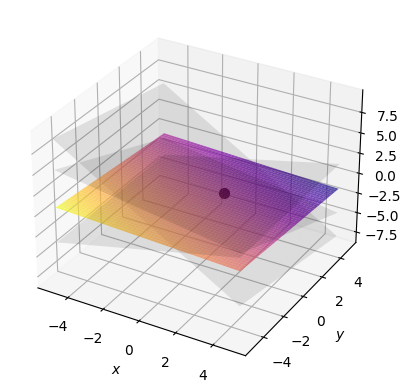

In [87]:
### ---Cette partie, lambda, mu et gamma sont créés aléatoirement !!!--- ###
n_lamda, n_mu, n_gamma = np.random.uniform(-2, 2, 3) # Vous pouvez changer les valeurs ici.

ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="black", alpha=0.1)
    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
                 
ax.plot_surface(X, Y, plan_nouveau_Z, cmap="plasma", alpha=0.7)
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=50)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./a2.pdf")
plt.show()

Étape 3 : Le plan que l'on recherche est à la fois une combinaison linéaire des trois formes linéaires du point et une translation (en parallèle) du plan donné. Après notre calcul, il est temps de vérifier !

Explication :
- Le **Plan que l'on souhaite** est représenté en rouge.
- Le point d'intersection des 3 plans est représenté en gris.
- Le plan donné est représenté en bleu.

In [61]:
def parallel_partie(point=Point(), plan=Plan()):
     parametre_lambda_gamma_mu = sp.solve([lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0] - plan.params[0][0], # lambda * a1 + mu * a2 + gamma * a3 = m
                                           lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1] - plan.params[0][1], # lambda * b1 + mu * b2 + gamma * b3 = n
                                        lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2] - plan.params[0][2]], [lamda, mu, gamma]) # lambda * c1 + mu * c2 + gamma * c3 = p
    
     return list(parametre_lambda_gamma_mu.values())

point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
plan_reference = Plan((2, 1, 3, 1)) 
n_lamda, n_mu, n_gamma = *parallel_partie(point_intersection, plan_reference),
display(n_lamda, n_mu, n_gamma)

4/17

9/17

-6/17

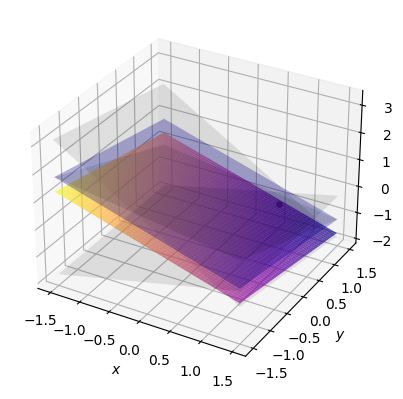

In [62]:
ax = plt.axes(projection="3d")

x_data = np.arange(-1.5, 1.5, 0.01)
y_data = np.arange(-1.5, 1.5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="black", alpha=0.1)
    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
                 
# ax.plot_surface(X, Y, plan_nouveau_Z, cmap="plasma", alpha=0.5)

### ---NOUVEAU PARTIE--- ###

plan_reference_Z = (plan_reference.params[0][3] - plan_reference.params[0][0] * X - plan_reference.params[0][1] * Y) / plan_reference.params[0][2]
ax.plot_surface(X, Y, plan_reference_Z, color="blue", alpha=0.3)
ans_Z = (ans[3] - ans[0] * X - ans[1] * Y) / ans[2]
ax.plot_surface(X, Y, ans_Z, cmap="plasma", alpha=0.7)
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=15, alpha=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
# ax.view_init(azim=75, elev=15)
plt.savefig("./a3.pdf")
plt.show()

## Opération (b): Perpendiculaire

> Dans cette partie, on va construire un plan (1 équation) passant par un point (3 équations) et perpendiculaire à une droite donnée (2 équations).

- Lemme : Si on a un plan $mx+ny+pz=q$ , alors on peut représenter son orthogonal comme : $\mathbb{K}.(m,n,p)$
    - Preuve : Soit $(x_1,y_1,z_1)$ , $(x_2,y_2,z_2)$ deux points sur le plan $mx+ny+pz=q$ , donc on a :
    $$\begin{cases}mx_1+ny_1+pz_1=q\\mx_2+ny_2+pz_2=q\end{cases}$$
    On calcule la différence entre ces deux équations et on obtient: $m(x_1-x_2)+n_(y_1-y_2)+p(z_1-z_2)=0$ \
    Donc la vecteur $(m,n,p)$ est bien perpendiculaire à tous les vecteurs sur le plan. De plus, dans $\mathbb{R}^3$, codimension d'un plan vaut 1.\
    Alors son orthogonal est $\mathbb{K}.(m,n,p)$ , et on en déduit que la direction de la droite perpendiculaire à ce plan est $(m,n,p)$.


- Notations:
    - La droite donné : $$\begin{cases}m_1x+n_1y+p_1z=q_1 \quad(\mathscr{P}_1)\\m_2x+n_2y+p_2z=q_2 \quad(\mathscr{P}_2)\end{cases}$$
    - Les deux hyperplans affines correspondants : $$\begin{cases}\mathscr{H}_1 = \text{Ker }(\varphi_1)+A_1,\quad \varphi_1:(x,y,z)\mapsto m_1x+n_1y+p_1z \\ \mathscr{H}_2 =\text{Ker }(\varphi_2)+A_2,\quad \varphi_1:(x,y,z)\mapsto m_2x+n_2y+p_2z\end{cases}$$

- D'après le lemme au-dessus et comme la droite est bien perpendiculaire à ce plan , donc on obtient sa direction : $e=(\lambda a_1+\mu a_2+\gamma a_3,\lambda b_1+\mu b_2+\gamma b_3,\lambda d_1+\mu d_2+\gamma d_3)$

-  D'après la propriété d'un plan affine et le **Faisceau d'hyperplan** , on a si $\mathscr{P}_1$ est un hyperplan affine de direction $\text{Ker}(\varphi_1)$ et $\mathscr{P}_2$ est un hyperplan affine de direction $\text{Ker}(\varphi_2)$ , la droite définie par ces deux hyperplans est de direction $\text{Ker}(\varphi_1) \cap \text{Ker}(\varphi_2)$ 
- Alors on a bien: $e\in \text{Ker}(\varphi_1)$ et  $e\in \text{Ker}(\varphi_2)$, donc on obtient deux équations.
$$\begin{cases} m_1(\lambda a_1+\mu a_2+\gamma a_3)+n_1(\lambda b_1+\mu b_2+\gamma b_3)+p_1(\lambda d_1+\mu d_2+\gamma d_3)=0\\m_2(\lambda a_1+\mu a_2+\gamma a_3)+n_2(\lambda b_1+\mu b_2+\gamma b_3)+p_2(\lambda d_1+\mu d_2+\gamma d_3)=0\end{cases}$$
- Donc on obtient les valeurs de $(\lambda,\mu,\gamma)$.

In [63]:
'''
Operation (b)
'''
import sympy as sp

def perpendiculaire(point=Point(), droite=Droite()):
    parametre_matrice = sp.solve([(lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0])*droite.params[0][0]+ 
                                   (lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1])*droite.params[0][1]+
                                   (lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2])*droite.params[0][2],
                                   (lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0])*droite.params[1][0]+ 
                                   (lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1])*droite.params[1][1]+
                                   (lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2])*droite.params[1][2]
                                  ], [lamda, mu,gamma]) 
     
    point_func = sp.Matrix([[point.params[0][0], point.params[0][1], point.params[0][2], -point.params[0][3]], # a1, b1, c1, -d1
                             [point.params[1][0], point.params[1][1], point.params[1][2], -point.params[1][3]], # a2, b2, c2, -d2
                             [point.params[2][0], point.params[2][1], point.params[2][2], -point.params[2][3]], # a3, b3, c3, -d3
                             ])
     
    Result = sp.Matrix([lamda, mu,gamma]).subs(parametre_matrice).transpose() * point_func
    Result_final = Result.subs({gamma:1})# Il y a une infinité de combinaisons possibles, mais on n'a besoin de qu'une
    return Result_final

point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
droite_reference = Droite((2, 1, 3, 1),(3,9,17,1)) 
b = perpendiculaire(point_intersection, droite_reference)
b

Matrix([[17/36, 85/72, -17/24, -19/9]])

### Partie Matplotlib
Étape 1 : Point représenté par 3 équations

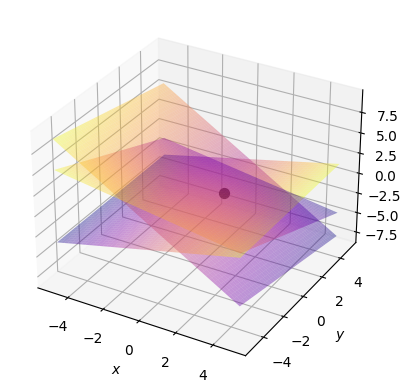

In [69]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], cmap="plasma", alpha=0.4)

# Le ligne 20 est SEULEMENT POUR DÉMONSTRATION, MAIS PAS DANS LA PARTIE D'ILLUSTRATION !
point_commun = sp.solve((point_intersection.eqs[0], point_intersection.eqs[1], point_intersection.eqs[2]), (x, y, z))
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=50)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./b1.pdf")
plt.show()

Étape 2 : Droite représenté par 2 équations

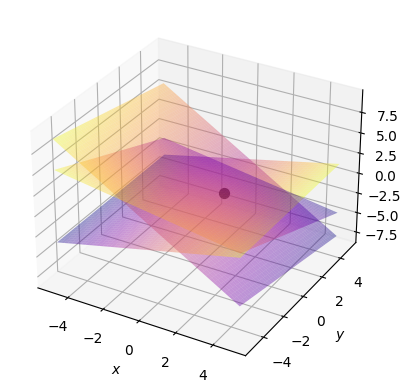

In [70]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], cmap="plasma", alpha=0.4)

# Le ligne 20 est SEULEMENT POUR DÉMONSTRATION, MAIS PAS DANS LA PARTIE D'ILLUSTRATION !
point_commun = sp.solve((point_intersection.eqs[0], point_intersection.eqs[1], point_intersection.eqs[2]), (x, y, z))
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=50)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./b1.pdf")
plt.show()

## Question 3

In [80]:
def perpendiculaire_commune(droite1=Droite(),droite2=Droite()):
    point_sur_droite = Point_de_droite(m ,droite1)
    point_de_nouveau = Point(droite2.params[0],droite2.params[1], tuple(perpendiculaire(point_sur_droite, droite1)))
    point_de_retour  =  Point(droite1.params[0],droite1.params[1], tuple(perpendiculaire(point_de_nouveau,droite2)))
    
    Le_constante = sp.solve([sp.Matrix([point_sur_droite.params[0],
                                        point_sur_droite.params[1],
                                        point_sur_droite.params[2],
                                        point_de_retour.params[2]]).det()],[m])
    
    Le_point_1 = Point_de_droite(Le_constante[m],droite1)
    Le_plan_1  = Plan(tuple(perpendiculaire(Le_point_1,droite1)))
    Le_point_2 = Point(droite2.params[0],droite2.params[1],Le_plan_1.params[0])
    Le_plan_2  = Plan(tuple(perpendiculaire(Le_point_2,droite2)))
    
    Droite_finale = Droite(Le_plan_1.params[0],Le_plan_2.params[0])
    
    return  Droite_finale.params

droite1=Droite((2, 1, 3, 1), (3, 9, 17, 1))
droite2=Droite((1,5,8,3),(9,11,3,6))
perpendiculaire_commune(droite1,droite2)

[(2/19, 5/19, -3/19, 415859/2132731),
 (-21973/213674, 20769/213674, -5117/106837, -2658625543/23984692826)]

## Question 4(a)
- Notations:
    - Le point 1 donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
    - Le point 2 donné par : $$\begin{cases}a_1'x+b_1'y+c_1'z=e_1 \\a_2'x+b_2'y+c_2'z=e_2\\a_3'x+b_3'y+c_3'y=e_3\end{cases}$$
- En utilisant l'opération a, on peut obtenir 3 plans passant par le point 2 et parallèles respectivement aux 3 plans passant par le point 1. Maintenant les plans passant par le point 2 peuvent être écrits comme :  $$\begin{cases}a_1x+b_1y+c_1z=d_1' \quad(\mathscr{H}_1)'\\a_2x+b_2y+c_2z=d_2'\quad(\mathscr{H}_2)'\\a_3x+b_3y+c_3y=d_3'\quad(\mathscr{H}_3)'\end{cases}$$
- D'après le **Faisceau d'hyperplan**, si on calcule la combinaison linéaire de ces 3 plans , on obtient toujours un plan passant par ce point. Donc pour chaque point (3 équations respectivement), on calcule la combinaison linéaire avec les même coefficients. Donc on obtient deux plans parallèles: $$\begin{cases}ax+by+cz=d \\ax+by+cz=d'\end{cases}$$
- Évidemment on veut $d=d'$ parce que le plan qu'on veut est le plan qui passe par le point 1 et à la fois le point 2. Comme les deux équations sont des combinaisons linéaires de 3 équations originales. Donc: $$\begin{cases}\lambda d_1+\mu d_2+\gamma d_3 =d \\\lambda d_1'+\mu d_2'+\gamma d_3' =d'\end{cases}$$ Et avec cette équation on peut calculer les coeffients de la combinaison linéaire, ensuite on obtient le plan passant par les deux points. Comme il y a de nombreuses solutions de cette équation, on choisit simplement 2 premières.

In [64]:
point1= Point((2, 5, 3, 1), (1, 0, 3, -1),(2, 1, -2, 0))
point2= Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))

plan_reference1 = Plan(point1.params[0])  
plan_reference2 = Plan(point1.params[1]) 
plan_reference3 = Plan(point1.params[2]) # 3 plans passant par le point 1 

a = parallel(point2, plan_reference1)
b = parallel(point2, plan_reference2)
c = parallel(point2, plan_reference3)  # 3 plans passant par le point 2 et parallèls à 3 plans au-desso

point_func = sp.Matrix([[point1.params[0][0], point1.params[0][1], point1.params[0][2], -point1.params[0][3]], # a1, b1, c1, -d1
                        [point1.params[1][0], point1.params[1][1], point1.params[1][2], -point1.params[1][3]], # a2, b2, c2, -d2
                        [point1.params[2][0], point1.params[2][1], point1.params[2][2], -point1.params[2][3]]]) # a3, b3, c3, -d3


noyau=sp.Matrix([a[3]-point2.params[0][3],b[3]-point2.params[1][3],c[3]-point2.params[2][3]]).transpose().nullspace()

# noyau de [[d1-d1'],[d2-d2'],[d3-d3']]
Result1 = noyau[0].transpose() *point_func
Result2 =noyau[1].transpose() *point_func
display(Result1, Result2)


Matrix([[77/103, -65/103, 270/103, 116/103]])

Matrix([[8/103, -392/103, -503/103, 99/103]])

## Question 4(b)
Dans cette partie, on va construire une droite (2 équations) passant par un point (3 équations) et perpendiculaire à un plan donné (1 équation) en utilisant l'opération b.
- Notations:
    - Le plan donné : $$mx+ny+pz=q \quad(\mathscr{P})$$
    - Le point donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
- On note la droite qu'on veut $\mathscr{l}$
- On fait intersecter le plan $\mathscr{P}$ et le plan $\mathscr{H}_1$, le plan $\mathscr{P}$ et le plan $\mathscr{H}_2$. Donc on obtient deux droites non parallèles sur le plan $\mathscr{P}$ connu , notés respectivement $A_1$ et $A_2$.

- Ensuite, en utilisant **l'opération b**, on calcule les deux plans qui sont respectivement perpendiculaires aux droites $A_1$ et $A_2$ et passent le point donné , notés respectivement $\mathscr{H}_a$ et $\mathscr{H}_b$. \
Comme on a $A_1 \perp \mathscr{H}_a$, $A_1$ est bien perpendiculaire à tous les droites sur le plan $\mathscr{H}_a$ et $\mathscr{l} \in \mathscr{H}_a$, donc on obtient que $A_1 \perp \mathscr{l}$. \
De même on obtient que $A_2 \perp \mathscr{l}$. Cela veut dire que $\mathscr{l}$ est perpendiculaire à deux doites non parallèles sur le plan $\mathscr{P}$.
- Finalement, on vérifie que $\mathscr{l} \perp \mathscr{P}$.

In [65]:
point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
droite_reference1 = Droite((1,2,3,1),(3,9,17,1)) 
droite_reference2 = Droite((4,1,3,2),(3,9,17,1))
c=perpendiculaire(point_intersection, droite_reference1)
d=perpendiculaire(point_intersection, droite_reference2)
c,d

(Matrix([[-119/72, 17/9, -17/24, -101/72]]),
 Matrix([[85/396, 1003/792, -17/24, -401/198]]))

## Question 4(a)
- Notations:
    - Le point 1 donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
    - Le point 2 donné par : $$\begin{cases}a_1'x+b_1'y+c_1'z=e_1 \\a_2'x+b_2'y+c_2'z=e_2\\a_3'x+b_3'y+c_3'y=e_3\end{cases}$$
- En utilisant l'opération a, on peut obtenir 3 plans passant par le point 2 et parallèles respectivement aux 3 plans passant par le point 1. Maintenant les plans passant par le point 2 peuvent être écrits comme :  $$\begin{cases}a_1x+b_1y+c_1z=d_1' \quad(\mathscr{H}_1)'\\a_2x+b_2y+c_2z=d_2'\quad(\mathscr{H}_2)'\\a_3x+b_3y+c_3y=d_3'\quad(\mathscr{H}_3)'\end{cases}$$
- D'après le **Faisceau d'hyperplan**, si on calcule la combinaison linéaire de ces 3 plans , on obtient toujours un plan passant par ce point. Donc pour chaque point (3 équations respectivement), on calcule la combinaison linéaire avec les même coefficients. Donc on obtient deux plans parallèles: $$\begin{cases}ax+by+cz=d \\ax+by+cz=d'\end{cases}$$
- Évidemment on veut $d=d'$ parce que le plan qu'on veut est le plan qui passe par le point 1 et à la fois le point 2. Comme les deux équations sont des combinaisons linéaires de 3 équations originales. Donc: $$\begin{cases}\lambda d_1+\mu d_2+\gamma d_3 =d \\\lambda d_1'+\mu d_2'+\gamma d_3' =d'\end{cases}$$ Et avec cette équation on peut calculer les coeffients de la combinaison linéaire, ensuite on obtient le plan passant par les deux points. Comme il y a de nombreuses solutions de cette équation, on choisit simplement 2 premières.

In [66]:
point1= Point((2, 5, 3, 1), (1, 0, 3, -1),(2, 1, -2, 0))
point2= Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))

plan_reference1 = Plan(point1.params[0])  
plan_reference2 = Plan(point1.params[1]) 
plan_reference3 = Plan(point1.params[2]) # 3 plans passant par le point 1 

a = parallel(point2, plan_reference1)
b = parallel(point2, plan_reference2)
c = parallel(point2, plan_reference3)  # 3 plans passant par le point 2 et parallèls à 3 plans au-desso

point_func = sp.Matrix([[point1.params[0][0], point1.params[0][1], point1.params[0][2], -point1.params[0][3]], # a1, b1, c1, -d1
                        [point1.params[1][0], point1.params[1][1], point1.params[1][2], -point1.params[1][3]], # a2, b2, c2, -d2
                        [point1.params[2][0], point1.params[2][1], point1.params[2][2], -point1.params[2][3]]]) # a3, b3, c3, -d3


noyau=sp.Matrix([a[3]-point2.params[0][3],b[3]-point2.params[1][3],c[3]-point2.params[2][3]]).transpose().nullspace()

# noyau de [[d1-d1'],[d2-d2'],[d3-d3']]
Result1 = noyau[0].transpose() *point_func
Result2 =noyau[1].transpose() *point_func
display(Result1, Result2)


Matrix([[77/103, -65/103, 270/103, 116/103]])

Matrix([[8/103, -392/103, -503/103, 99/103]])

## Question 4(b)
Dans cette partie, on va construire une droite (2 équations) passant par un point (3 équations) et perpendiculaire à un plan donné (1 équation) en utilisant l'opération b.
- Notations:
    - Le plan donné : $$mx+ny+pz=q \quad(\mathscr{P})$$
    - Le point donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
- On note la droite qu'on veut $\mathscr{l}$
- On fait intersecter le plan $\mathscr{P}$ et le plan $\mathscr{H}_1$, le plan $\mathscr{P}$ et le plan $\mathscr{H}_2$. Donc on obtient deux droites non parallèles sur le plan $\mathscr{P}$ connu , notés respectivement $A_1$ et $A_2$.

- Ensuite, en utilisant **l'opération b**, on calcule les deux plans qui sont respectivement perpendiculaires aux droites $A_1$ et $A_2$ et passent le point donné , notés respectivement $\mathscr{H}_a$ et $\mathscr{H}_b$. \
Comme on a $A_1 \perp \mathscr{H}_a$, $A_1$ est bien perpendiculaire à tous les droites sur le plan $\mathscr{H}_a$ et $\mathscr{l} \in \mathscr{H}_a$, donc on obtient que $A_1 \perp \mathscr{l}$. \
De même on obtient que $A_2 \perp \mathscr{l}$. Cela veut dire que $\mathscr{l}$ est perpendiculaire à deux doites non parallèles sur le plan $\mathscr{P}$.
- Finalement, on vérifie que $\mathscr{l} \perp \mathscr{P}$.

In [67]:
point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
droite_reference1 = Droite((1,2,3,1),(3,9,17,1)) 
droite_reference2 = Droite((4,1,3,2),(3,9,17,1))
c=perpendiculaire(point_intersection, droite_reference1)
d=perpendiculaire(point_intersection, droite_reference2)
c,d

(Matrix([[-119/72, 17/9, -17/24, -101/72]]),
 Matrix([[85/396, 1003/792, -17/24, -401/198]]))